In [1]:
#Here we import all the necessary dependencies
import numpy as np
import matplotlib.pyplot as plt
import time
import amuse.plot as plot
from IPython.display import clear_output
from amuse.lab import units, constants
from amuse.ext.orbital_elements import new_binary_from_orbital_elements
from amuse.ext.orbital_elements import get_orbital_elements_from_binary
from amuse.ext.orbital_elements import get_orbital_elements_from_binaries
from amuse.lab import Particles
from amuse.lab import nbody_system
from amuse.io import write_set_to_file, read_set_from_file

In [2]:
data_loc = "Results/"

In [4]:
logtimes = [-1e9,6.698,7.0,7.176,7.301,7.397,7.477,7.544,7.602,7.653,7.698,7.740,7.778,7.812,7.845,7.875,7.903,7.929,7.954,7.977]
times = 10**np.array(logtimes)

Vanilla8_0 = read_set_from_file(data_loc + "Vanilla_run8_time=-inf.hdf5", format = "hdf5")
Vanilla8_1 = read_set_from_file(data_loc + "Vanilla_run8_time=6.698.hdf5", format = "hdf5")
Vanilla8_2 = read_set_from_file(data_loc + "Vanilla_run8_time=7.0.hdf5", format = "hdf5")
Vanilla8_3 = read_set_from_file(data_loc + "Vanilla_run8_time=7.176.hdf5", format = "hdf5")
Vanilla8_4 = read_set_from_file(data_loc + "Vanilla_run8_time=7.301.hdf5", format = "hdf5")
Vanilla8_5 = read_set_from_file(data_loc + "Vanilla_run8_time=7.397.hdf5", format = "hdf5")
Vanilla8_6 = read_set_from_file(data_loc + "Vanilla_run8_time=7.477.hdf5", format = "hdf5")
Vanilla8_7 = read_set_from_file(data_loc + "Vanilla_run8_time=7.544.hdf5", format = "hdf5")
Vanilla8_8 = read_set_from_file(data_loc + "Vanilla_run8_time=7.602.hdf5", format = "hdf5")
Vanilla8_9 = read_set_from_file(data_loc + "Vanilla_run8_time=7.653.hdf5", format = "hdf5")
Vanilla8_10 = read_set_from_file(data_loc + "Vanilla_run8_time=7.698.hdf5", format = "hdf5")
Vanilla8_11 = read_set_from_file(data_loc + "Vanilla_run8_time=7.740.hdf5", format = "hdf5")
Vanilla8_12 = read_set_from_file(data_loc + "Vanilla_run8_time=7.778.hdf5", format = "hdf5")
Vanilla8_13 = read_set_from_file(data_loc + "Vanilla_run8_time=7.812.hdf5", format = "hdf5")
Vanilla8_14 = read_set_from_file(data_loc + "Vanilla_run8_time=7.845.hdf5", format = "hdf5")
Vanilla8_15 = read_set_from_file(data_loc + "Vanilla_run8_time=7.875.hdf5", format = "hdf5")
Vanilla8_16 = read_set_from_file(data_loc + "Vanilla_run8_time=7.903.hdf5", format = "hdf5")
Vanilla8_17 = read_set_from_file(data_loc + "Vanilla_run8_time=7.929.hdf5", format = "hdf5")
Vanilla8_18 = read_set_from_file(data_loc + "Vanilla_run8_time=7.954.hdf5", format = "hdf5")
Vanilla8_19 = read_set_from_file(data_loc + "Vanilla_run8_time=7.977.hdf5", format = "hdf5")

In [5]:
sets = []
for i in range(len(logtimes)):
    exec("sets.append(Vanilla8_"+str(i)+")")

In [6]:
sets[0][0].mass.in_(units.MJupiter)

quantity<1.0001605215 MJupiter>

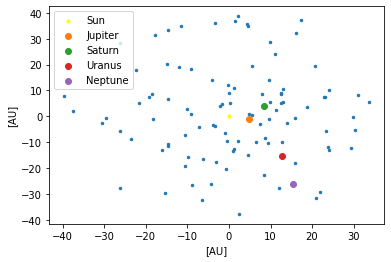

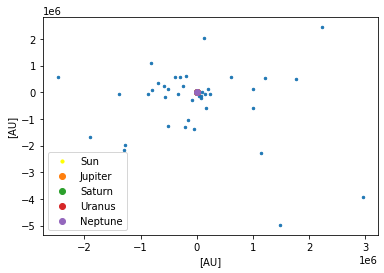

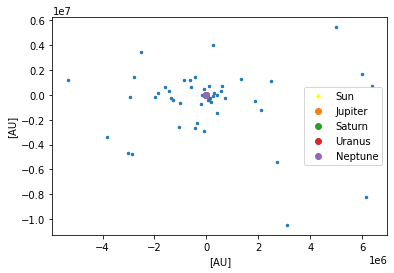

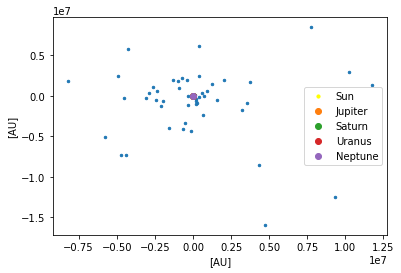

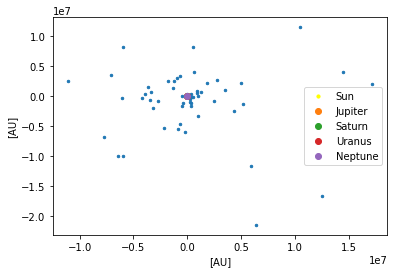

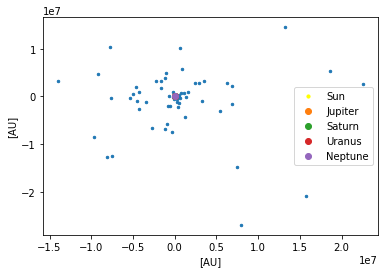

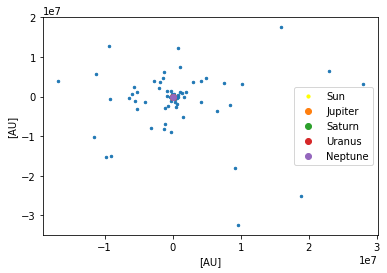

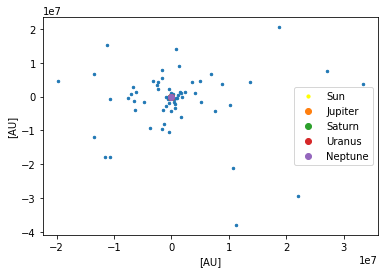

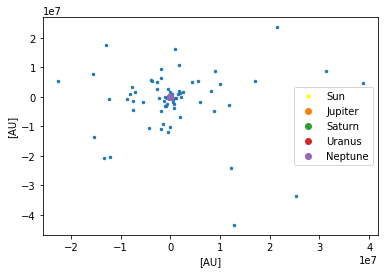

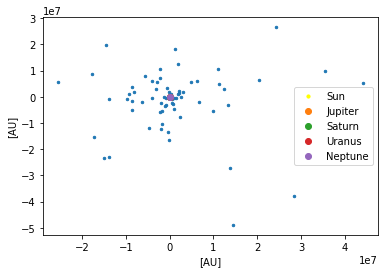

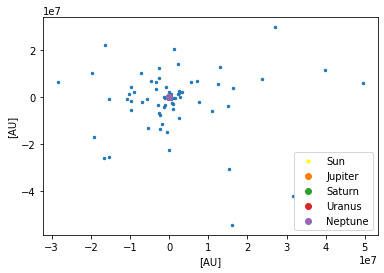

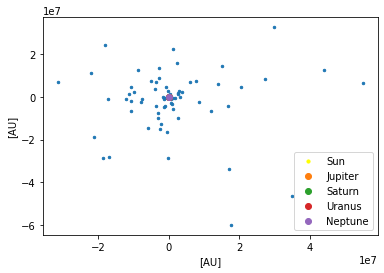

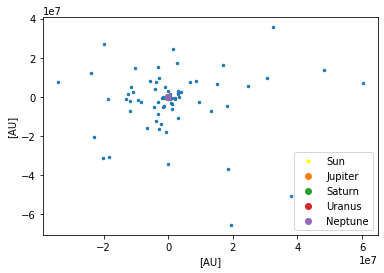

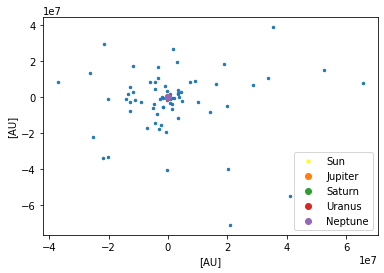

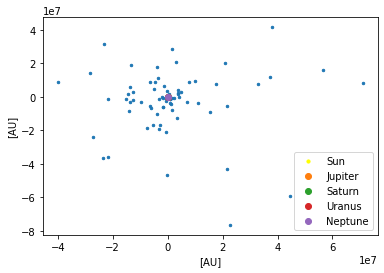

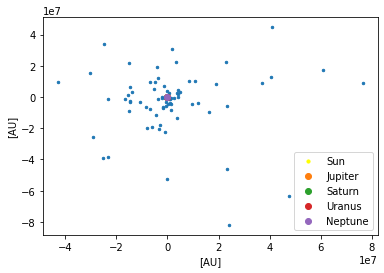

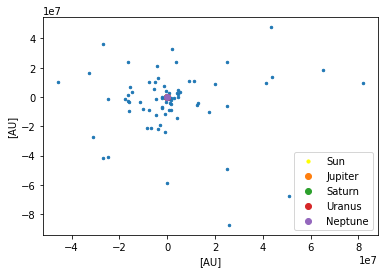

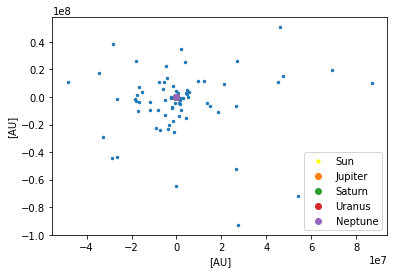

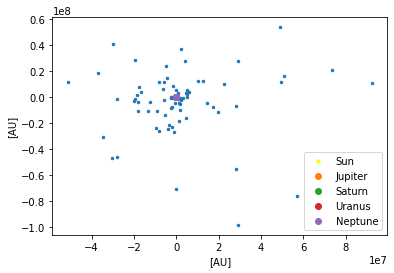

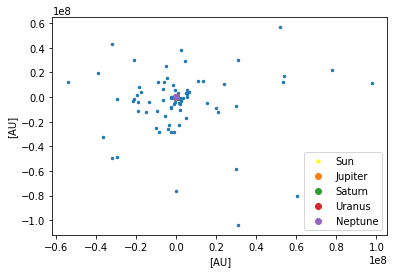

In [7]:
names = ['Jupiter', 'Saturn', 'Uranus', 'Neptune']
for particles in sets:
    plot.scatter(0|units.AU, 0|units.AU, s=10, label='Sun', c='yellow')
    plot.scatter(particles.x.in_(units.AU), particles.y.in_(units.AU), s=6)
    for j in range(4):
        plot.scatter(particles[j].x.in_(units.AU), particles[j].y.in_(units.AU), label = names[j])
    plt.legend()
    #plot.xlim(particles[0].x -  (200 | units.AU), particles[0].x + (200 | units.AU))
    #plot.ylim(particles[0].y -  (200 | units.AU), particles[0].y + (200 | units.AU))
    plt.show()

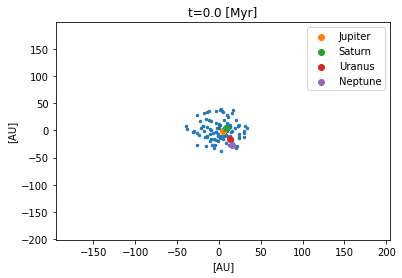

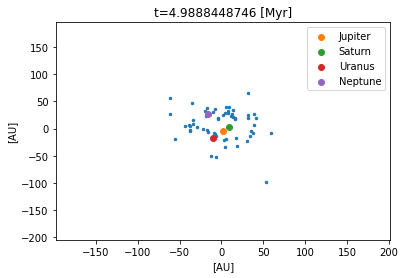

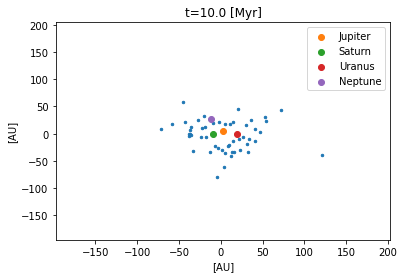

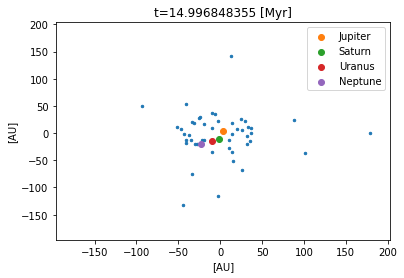

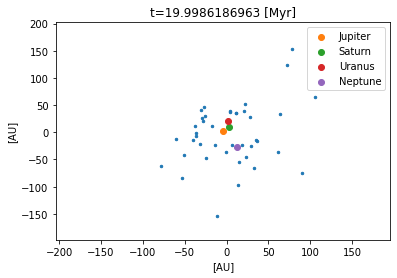

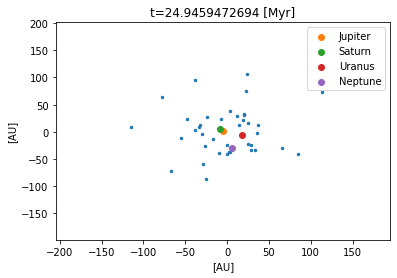

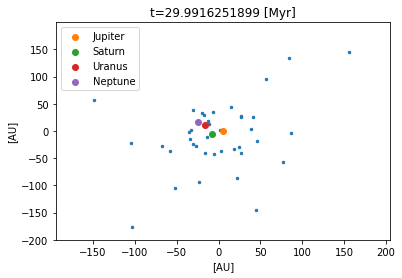

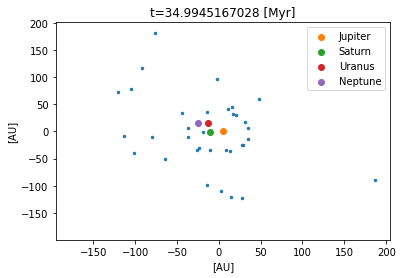

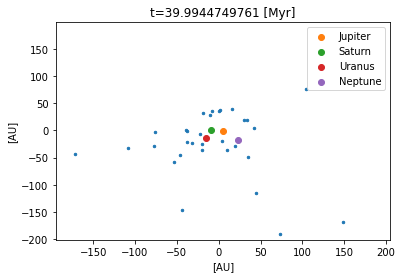

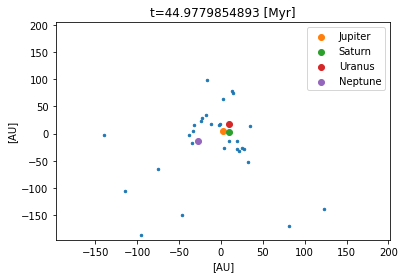

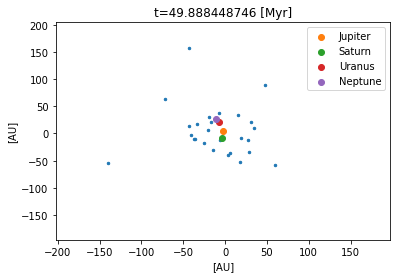

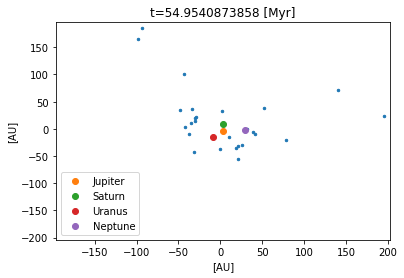

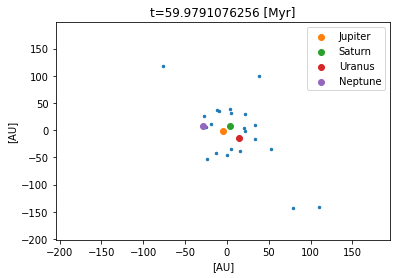

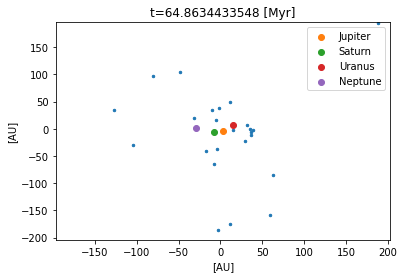

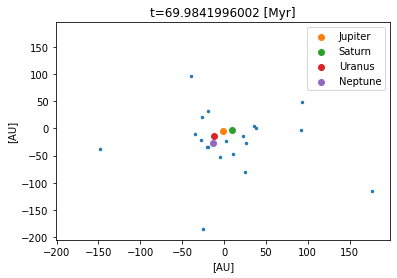

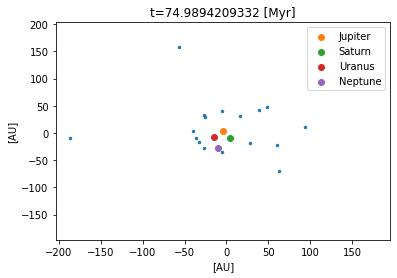

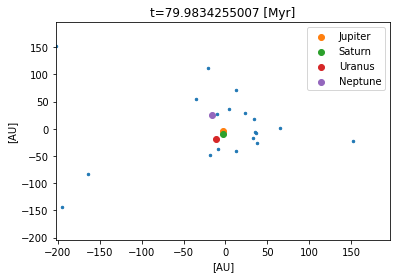

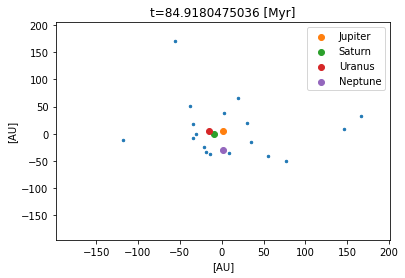

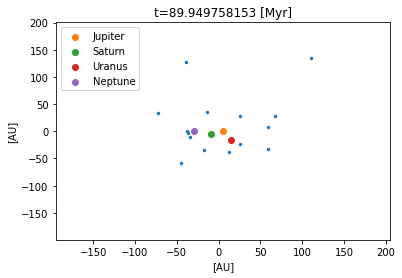

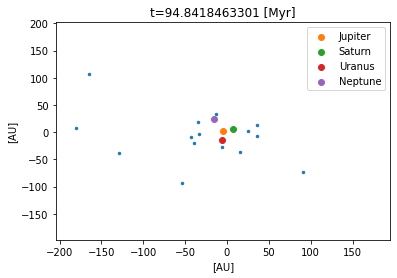

In [8]:
for particles, i in zip(sets, range(len(logtimes))):
    plot.scatter(particles.x.in_(units.AU), particles.y.in_(units.AU), s=6)
    for j in range(4):
        plot.scatter(particles[j].x.in_(units.AU), particles[j].y.in_(units.AU), label = names[j])
    plt.legend()
    plot.xlim(particles[0].x -  (200 | units.AU), particles[0].x + (200 | units.AU))
    plot.ylim(particles[0].y -  (200 | units.AU), particles[0].y + (200 | units.AU))
    plt.title("t="+str(times[i]/1e6)+' [Myr]')
    plt.show()

In [9]:
def separations(p1, p2):
    return (p1.position - p2.position).lengths()

def v_esc(M,r):
    return (2*constants.G*M/r).sqrt()

def v_rel(Sun, particles):
    return (Sun.velocity-particles.velocity).lengths()

def a_orbit(Sun, particles):
    return get_orbital_elements_from_binaries(Sun, particles, constants.G)[2]

def eccentricities(Sun, particles):
    return get_orbital_elements_from_binaries(Sun, particles, constants.G)[3]

def inclinations(Sun, particles):
    i = get_orbital_elements_from_binaries(Sun, particles, constants.G)[5]
    if i>(90|units.deg):
        return (180|units.deg)-i
    else:
        return i

## Let's plot the semi major axis of the planets in time

In [10]:
for particles in sets:
    particles[0:4].name = ['JUPITER', 'SATURN', 'URANUS', 'NEPTUNE']

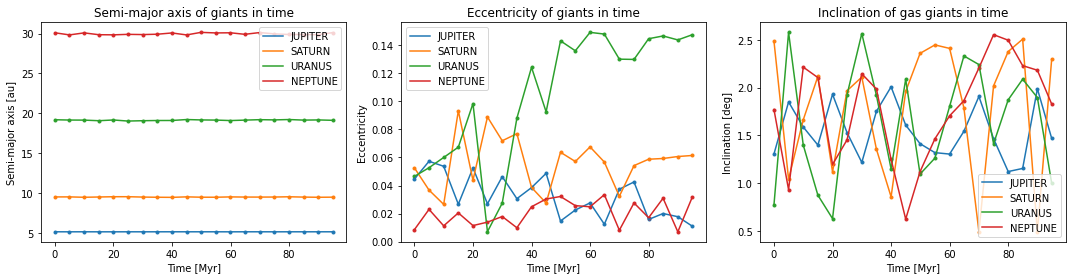

In [11]:
Sun = Particles(1)
Sun.name = 'SUN'
Sun.mass = 1 | units.MSun
Sun.position = (0| units.AU, 0| units.AU, 0| units.AU)
Sun.velocity = (0|units.kms, 0| units.kms, 0|units.kms)
Sun_giants = sets[0][:4]
#a0 = a_orbit(Sun_giants[0], Sun_giants).in_(units.AU)
#e0 = eccentricities(Sun_giants[0], Sun_giants)
#i0 = inclinations(Sun_giants[0], Sun_giants).in_(units.deg)

fig, axs = plt.subplots(1,3, figsize=(15,4))
for planet in ['JUPITER', 'SATURN', 'URANUS', 'NEPTUNE']:
    semi_axes, eccs, inclis = [], [], []
    for particles in sets:
        if sum(particles.name == planet) == 1:
            giant = particles[particles.name == planet]
            a = a_orbit(Sun, giant).in_(units.AU).number
            e = eccentricities(Sun, giant)
            i = inclinations(Sun, giant).in_(units.deg).number
            semi_axes.append(a)
            eccs.append(e)
            inclis.append(i)
    axs[0].scatter(times[:len(semi_axes)]/1e6, semi_axes, marker='.')
    axs[0].plot(times[:len(semi_axes)]/1e6, semi_axes, label=planet)
    axs[1].scatter(times[:len(eccs)]/1e6, eccs, marker='.')
    axs[1].plot(times[:len(eccs)]/1e6, eccs, label=planet)
    axs[2].scatter(times[:len(inclis)]/1e6, inclis, marker='.')
    axs[2].plot(times[:len(inclis)]/1e6, inclis, label=planet)
axs[0].legend()
axs[0].set_xlabel("Time [Myr]")
axs[0].set_ylabel(r"Semi-major axis [au]")
axs[0].set_title("Semi-major axis of giants in time")
axs[1].legend()
axs[1].set_xlabel("Time [Myr]")
axs[1].set_ylabel(r"Eccentricity")
axs[1].set_title("Eccentricity of giants in time")
axs[2].legend()
axs[2].set_xlabel("Time [Myr]")
axs[2].set_ylabel(r"Inclination [deg]")
axs[2].set_title("Inclination of gas giants in time")
fig.tight_layout()

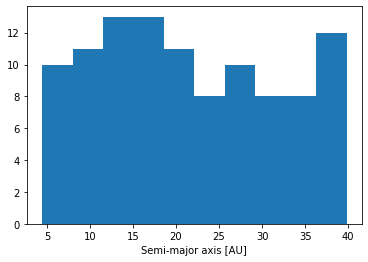

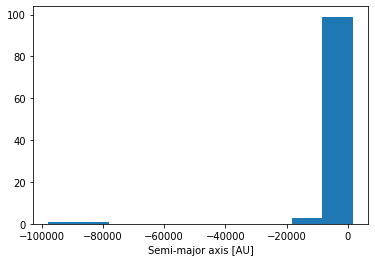

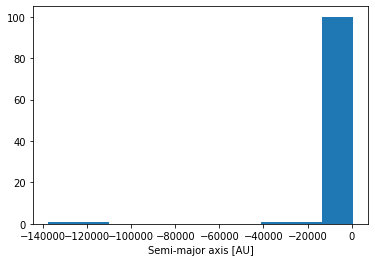

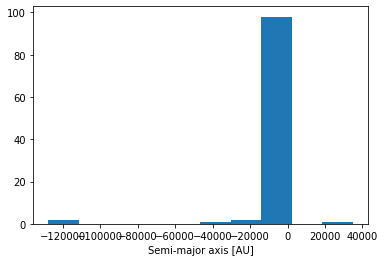

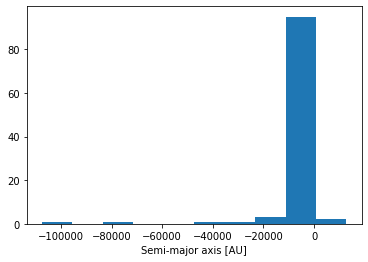

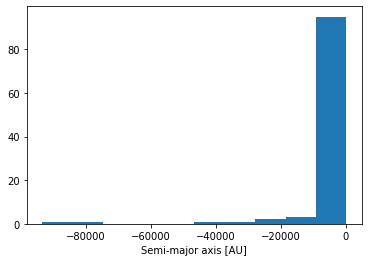

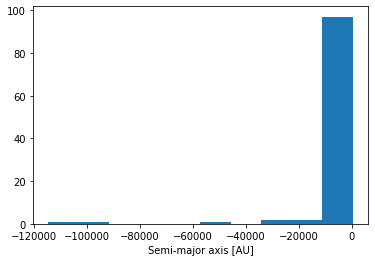

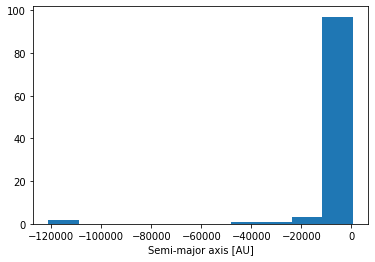

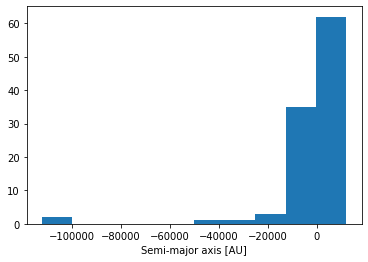

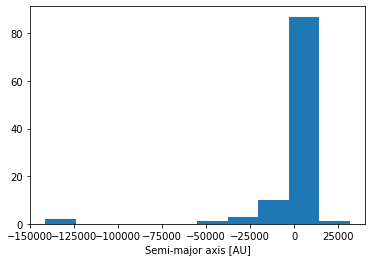

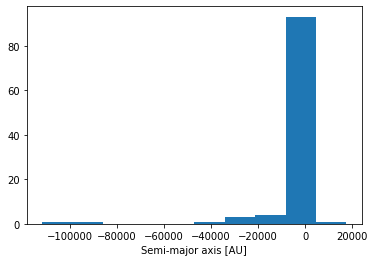

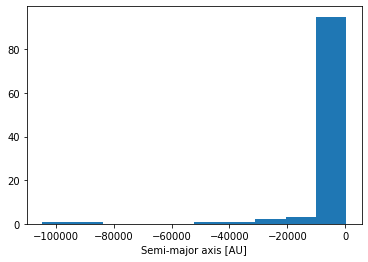

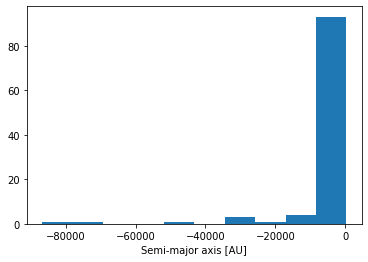

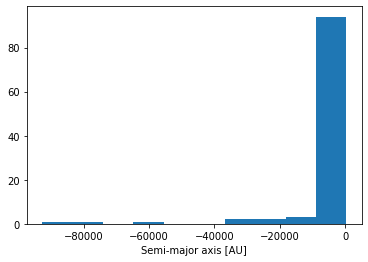

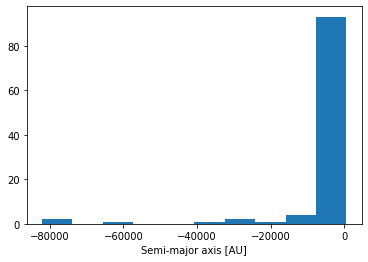

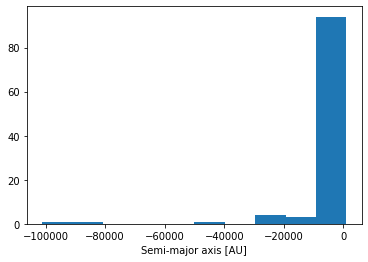

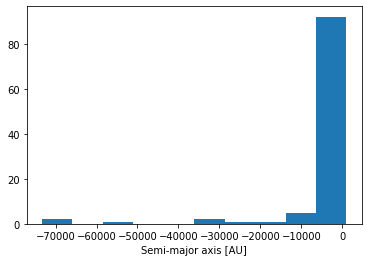

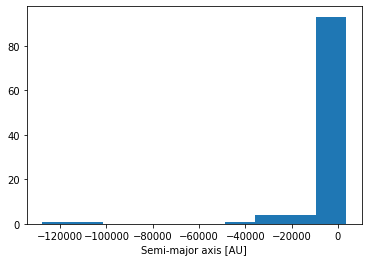

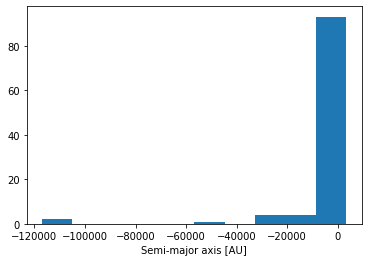

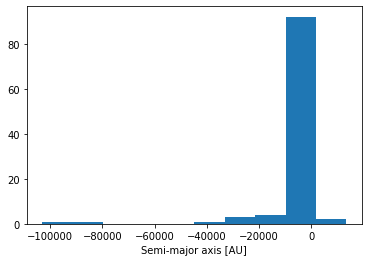

In [12]:
for particles in sets:
    plot.hist(a_orbit(Sun, particles).in_(units.AU))
    plt.xlabel("Semi-major axis [AU]")
    plt.show()

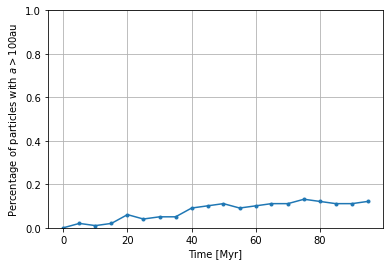

In [13]:
# Determine the percentage of particles with a > 100 AU in each timestep
percentage = []
n_particles = len(sets[0]) - 5
for particles in sets:
    n_deleted_ps = n_particles - (len(particles)-5)
    percentage.append((sum(a_orbit(Sun, particles[4:]) > (100 | units.AU)) + n_deleted_ps) / n_particles)
plt.plot(times/1e6, percentage, marker='.')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of particles with $a>100$au")
plt.grid()
plt.ylim(0, 1)
plt.show()
np.save('percentage_van8.npy', percentage)

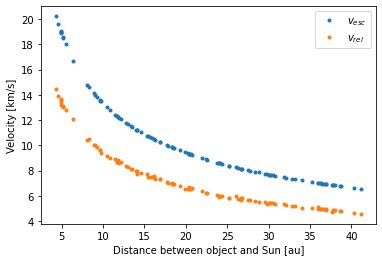

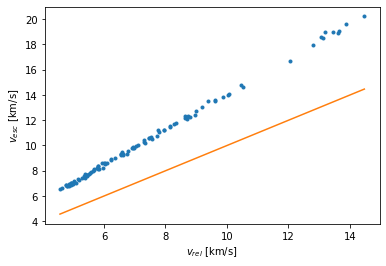

In [14]:
plot.plot(separations(Sun, sets[0]), v_esc(Sun.mass, separations(Sun, sets[0])).in_(units.km/units.s), linewidth=0, marker='.', label=r"$v_{esc}$")
plot.plot(separations(Sun, sets[0]), v_rel(Sun, sets[0]).in_(units.km/units.s), linewidth=0, marker='.', label=r"$v_{rel}$")
plt.xlabel("Distance between object and Sun [au]")
plt.ylabel("Velocity [km/s]")
plt.legend()
plt.show()
plot.plot(v_rel(Sun, sets[0]).in_(units.km/units.s), v_esc(Sun.mass, separations(Sun, sets[0])).in_(units.km/units.s), linewidth=0, marker='.')
plot.plot([min(v_rel(Sun, sets[0]).in_(units.km/units.s)).number, max(v_rel(Sun, sets[0]).in_(units.km/units.s)).number], [min(v_rel(Sun, sets[0]).in_(units.km/units.s)).number, max(v_rel(Sun, sets[0]).in_(units.km/units.s)).number])
plt.xlabel(r"$v_{rel}$ [km/s]")
plt.ylabel(r"$v_{esc}$ [km/s]");

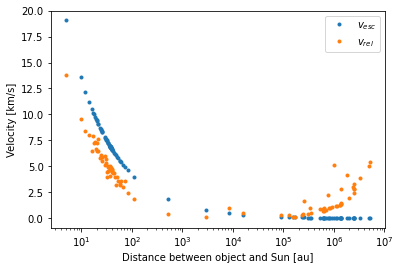

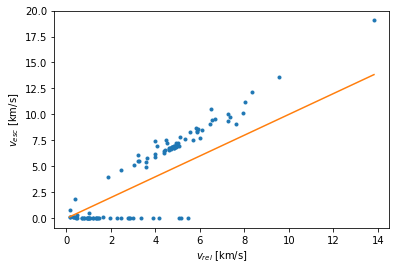

In [15]:
plot.plot(separations(Sun, sets[1]), v_esc(Sun.mass, separations(Sun, sets[1])).in_(units.km/units.s), linewidth=0, marker='.', label=r"$v_{esc}$")
plot.plot(separations(Sun, sets[1]), v_rel(Sun, sets[1]).in_(units.km/units.s), linewidth=0, marker='.', label=r"$v_{rel}$")
plt.xlabel("Distance between object and Sun [au]")
plt.ylabel("Velocity [km/s]")
plt.xscale('log')
plt.legend()
plt.show()
plot.plot(v_rel(Sun, sets[1]).in_(units.km/units.s), v_esc(Sun.mass, separations(Sun, sets[1])).in_(units.km/units.s), linewidth=0, marker='.')
plot.plot([min(v_rel(Sun, sets[1]).in_(units.km/units.s)).number, max(v_rel(Sun, sets[1]).in_(units.km/units.s)).number], [min(v_rel(Sun, sets[1]).in_(units.km/units.s)).number, max(v_rel(Sun, sets[1]).in_(units.km/units.s)).number])
plt.xlabel(r"$v_{rel}$ [km/s]")
plt.ylabel(r"$v_{esc}$ [km/s]");

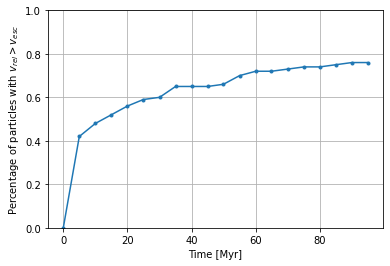

In [16]:
percentages = []
n_particles = len(sets[0])
for i in range(len(logtimes)):
    # mask gives boolean array with True where v_rel > v_esc
    mask = v_rel(Sun, sets[i][4:]).in_(units.km/units.s) > v_esc(Sun.mass, separations(Sun, sets[i][4:])).in_(units.km/units.s)
    n_deleted_ps = n_particles - len(sets[i])
    percentages.append((sum(mask)+n_deleted_ps)/100)
plt.plot(times/1e6, percentages, marker='.')
plt.xlabel("Time [Myr]")
plt.ylabel("Percentage of particles with $v_{rel}>v_{esc}$")
plt.grid()
plt.ylim(0, 1)
plt.show()
np.save('vrel_vesc_percentage_van8.npy', percentages)

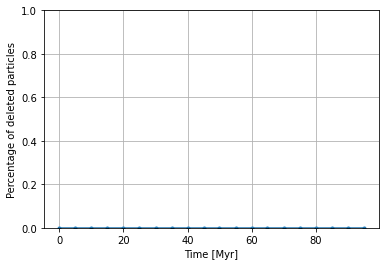

In [17]:
# Percentage of particles with distance from Sun > 300.000 AU, which is ~ the amount of particles deleted.
n_particles = len(sets[0][4:])
n_deleted = []
for i in range(len(logtimes)):
    n_deleted.append(n_particles - len(sets[i][4:]))
plt.plot(times/1e6, np.array(n_deleted)/100, marker='.')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of deleted particles")
plt.grid()
plt.ylim(0, 1)
plt.show()
np.save('deleted_percentage_van8.npy', np.array(n_deleted)/100)

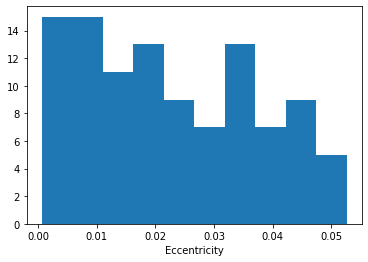

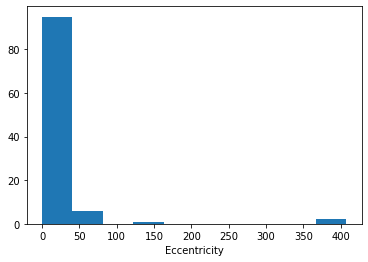

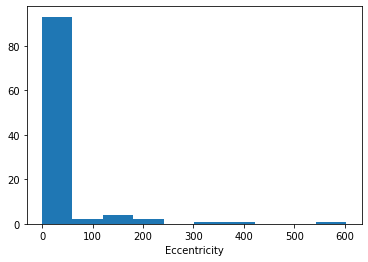

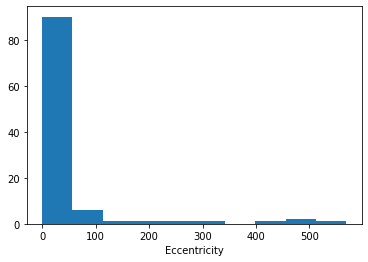

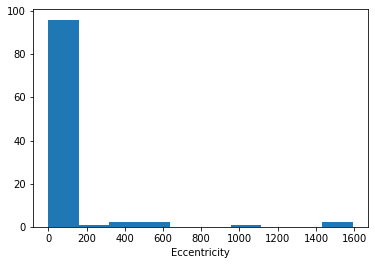

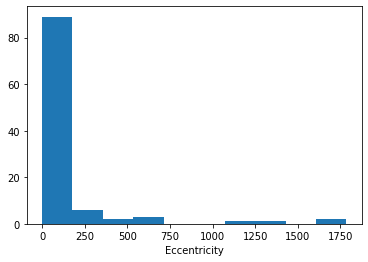

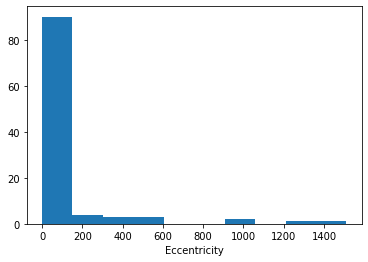

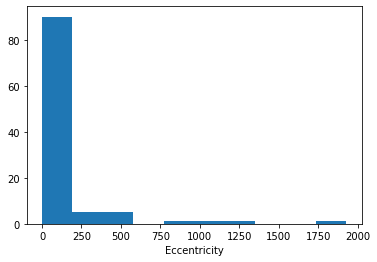

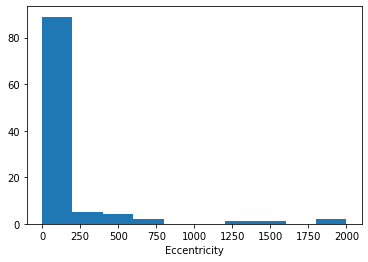

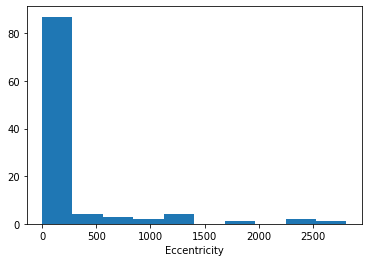

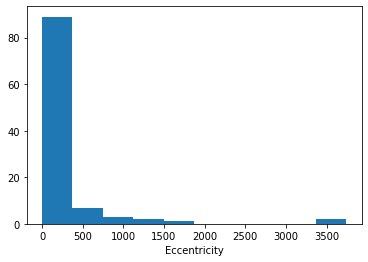

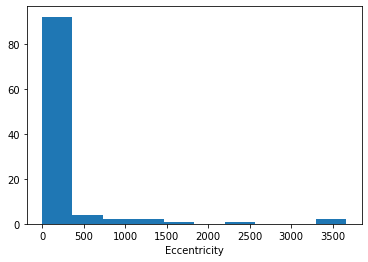

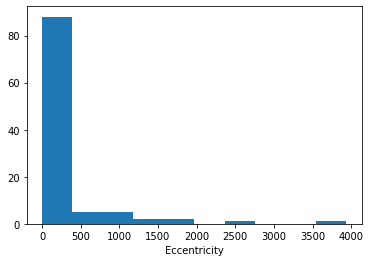

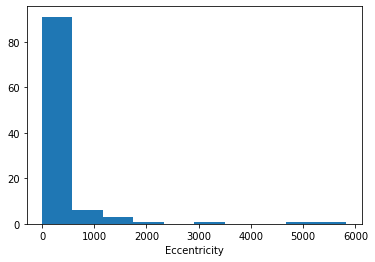

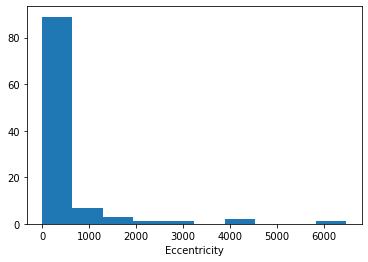

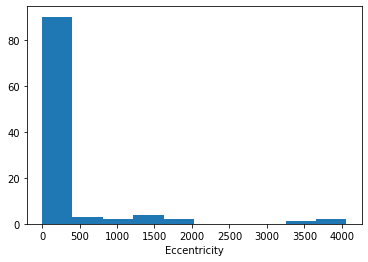

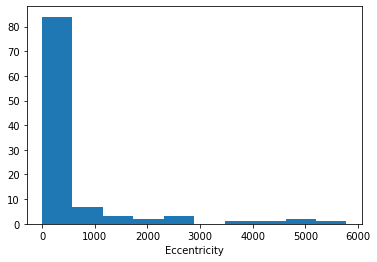

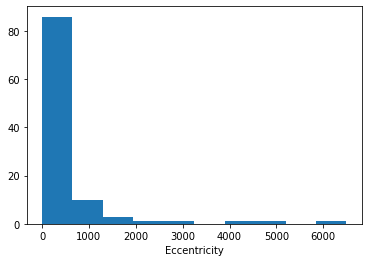

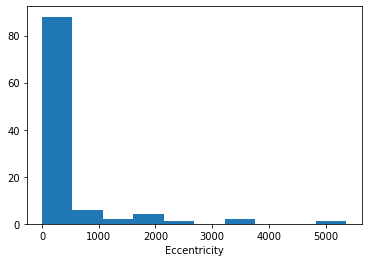

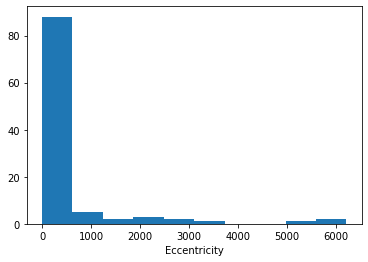

In [18]:
for particles in sets:
    plot.hist(eccentricities(Sun, particles))
    plt.xlabel("Eccentricity")
    plt.show()

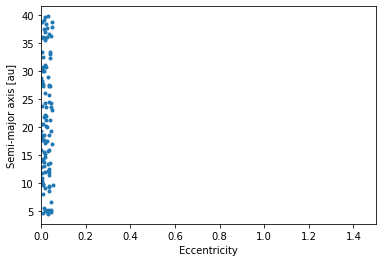

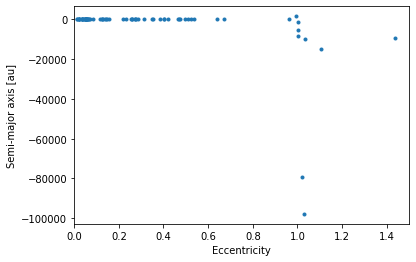

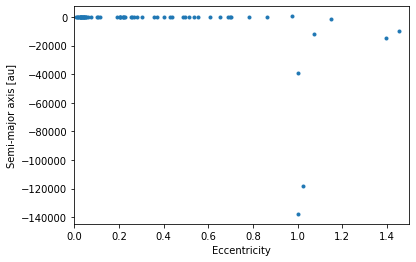

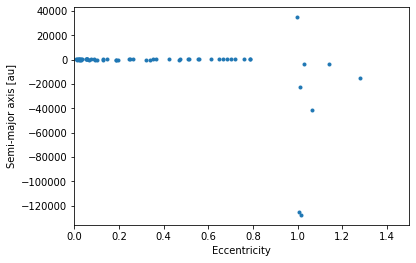

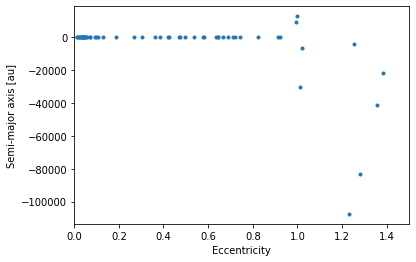

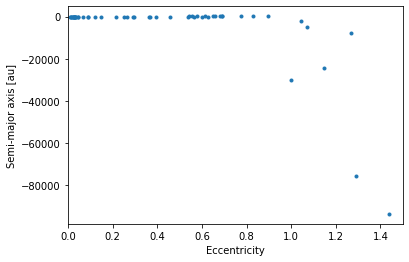

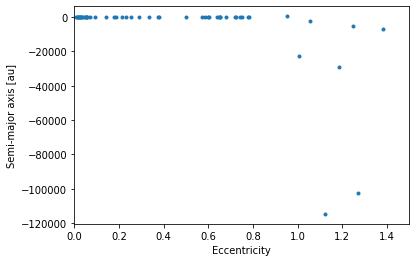

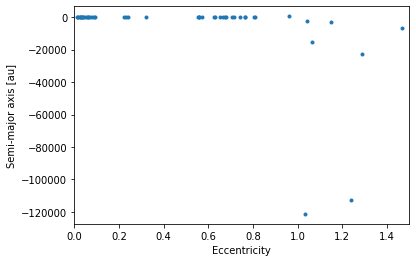

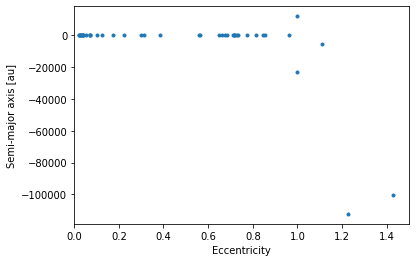

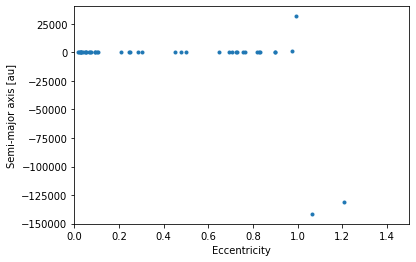

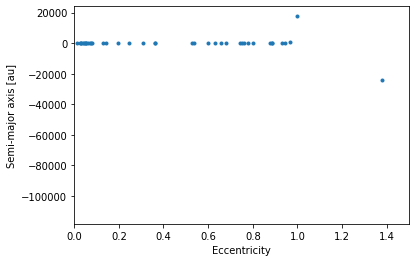

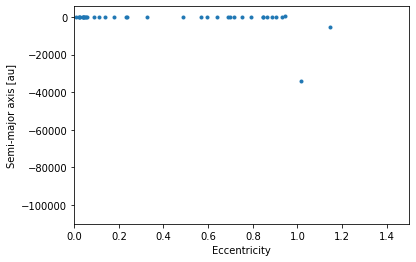

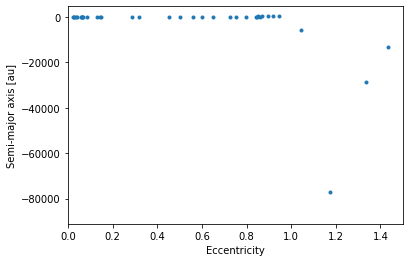

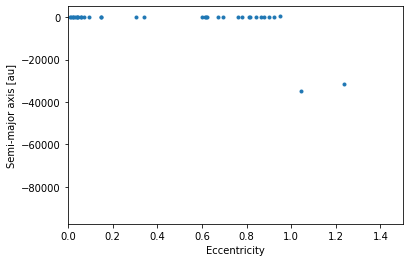

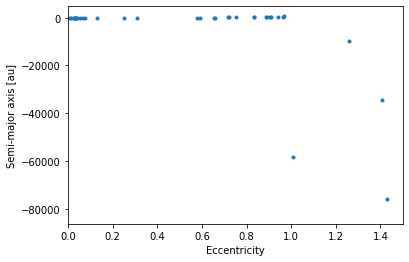

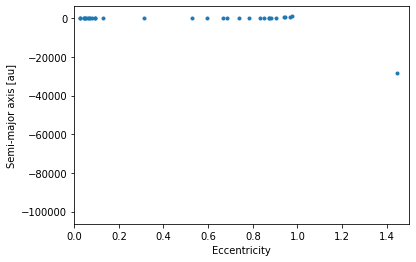

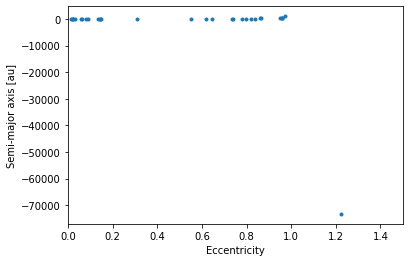

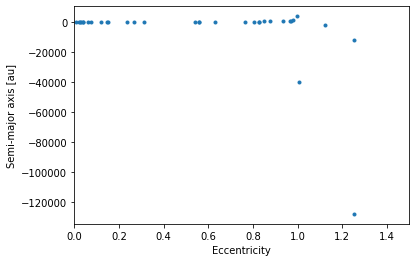

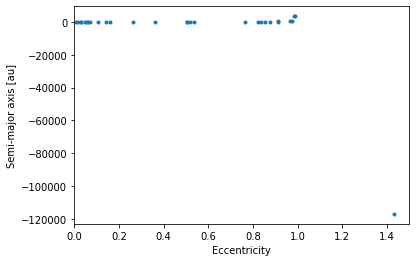

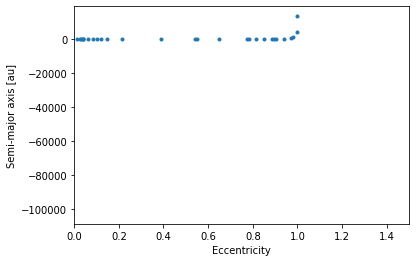

In [19]:
for particles in sets:
    plot.plot(eccentricities(Sun, particles), a_orbit(Sun, particles).in_(units.AU), linewidth=0, marker='.')
    plt.xlabel("Eccentricity")
    plt.ylabel("Semi-major axis [au]")
    plt.xlim(0, 1.5)
    #plt.ylim(0, 1000)
    plt.show()

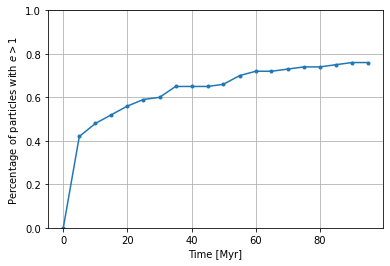

In [20]:
percentages = []
for i in range(len(logtimes)):
    # mask gives boolean array with True where e>1
    mask = eccentricities(Sun, sets[i][4:]) > 1
    percentages.append(sum(mask)/len(sets[i][4:]))
plt.plot(times/1e6, percentages, marker='.')
plt.xlabel("Time [Myr]")
plt.ylabel("Percentage of particles with $e>1$")
plt.grid()
plt.ylim(0, 1)
plt.show()
np.save('e_grtr_1_percentage_van8.npy', percentages)

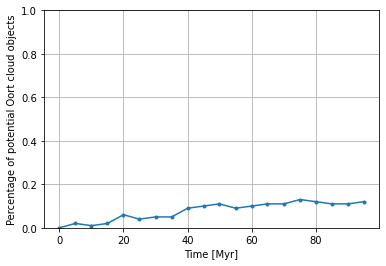

In [21]:
# Find particles that have a>100au, v_rel < v_esc, r<250.000au and e<1
percentages = []
n_deleted = 0
for i in range(len(logtimes)):
    n_deleted = len(sets[0])-len(sets[i])
    n_oort_objs = len(np.argwhere((a_orbit(Sun, sets[i][4:]) > (100|units.AU)) & (v_rel(Sun, sets[i][4:]).in_(units.km/units.s) < v_esc(Sun.mass, separations(Sun, sets[i][4:])).in_(units.km/units.s)) & (separations(Sun, sets[i][4:])<(250000|units.AU)) & (eccentricities(Sun, sets[i][4:]) < 1)))
    percentages.append((n_oort_objs+n_deleted) / len(sets[0][4:]))
plt.plot(times/1e6, percentages, marker='.')
plt.xlabel("Time [Myr]")
plt.ylabel("Percentage of potential Oort cloud objects")
plt.grid()
plt.ylim(0, 1)
plt.show()
np.save('pot_oort_percentage_van8.npy', percentages)

In [26]:
percentages[-1]

0.12

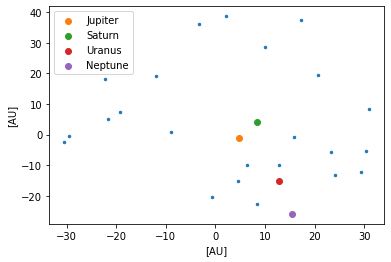

In [22]:
# Find particles that have a>100au, v_rel < v_esc, r<250.000au and e<1
# Then, for each particle find its begin-position
keys = []
for i in range(len(logtimes)):
    oort_objs = np.argwhere((a_orbit(Sun, sets[i]) > (100|units.AU)) & (v_rel(Sun, sets[i]).in_(units.km/units.s) < v_esc(Sun.mass, separations(Sun, sets[i])).in_(units.km/units.s)) & (separations(Sun, sets[i])<(250000|units.AU)) & (eccentricities(Sun, sets[i]) < 1))
    for index in oort_objs:
        if sets[i][index].key not in keys:
            keys.append(sets[i][index].key)

for key in keys:
    plot.scatter(sets[0][sets[0].key == key].x.in_(units.AU), sets[0][sets[0].key == key].y.in_(units.AU), s=6, c='C0')

keys = ['Jupiter', 'Saturn', 'Uranus', 'Neptune']
for j in range(4):
    plot.scatter(sets[0][j].x.in_(units.AU), sets[0][j].y.in_(units.AU), label = keys[j], color='C'+str(j+1))

plt.legend()
plt.show()

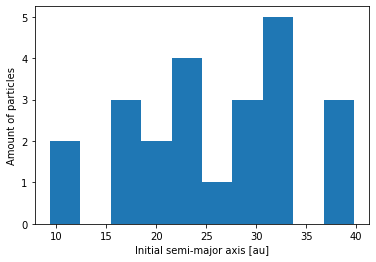

In [23]:
# Histogram of starting semi major axis of particles classified as potential Oort cloud objects
keys = []
for i in range(len(logtimes)):
    oort_objs = np.argwhere((a_orbit(Sun, sets[i]) > (100|units.AU)) & (v_rel(Sun, sets[i]).in_(units.km/units.s) < v_esc(Sun.mass, separations(Sun, sets[i])).in_(units.km/units.s)) & (separations(Sun, sets[i])<(250000|units.AU)) & (eccentricities(Sun, sets[i]) < 1))
    for index in oort_objs:
        if sets[i][index].key not in keys:
            keys.append(sets[i][index].key)

Oort_a = np.array([])
for key in keys:
    Oort_a = np.append(Oort_a, a_orbit(Sun, sets[0][sets[0].key==key]).in_(units.AU).number)
plot.hist(Oort_a)
plt.xlabel('Initial semi-major axis [au]')
plt.ylabel('Amount of particles')
np.save('begin_a_pot_Oort_van8.npy', Oort_a)

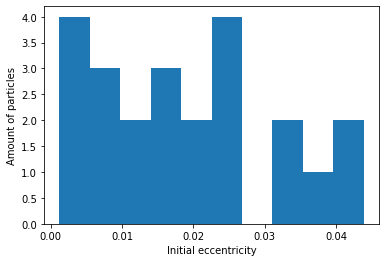

In [24]:
# Histogram of starting eccentricity of particles classified as potential Oort cloud objects
keys = []
for i in range(len(logtimes)):
    oort_objs = np.argwhere((a_orbit(Sun, sets[i]) > (100|units.AU)) & (v_rel(Sun, sets[i]).in_(units.km/units.s) < v_esc(Sun.mass, separations(Sun, sets[i])).in_(units.km/units.s)) & (separations(Sun, sets[i])<(250000|units.AU)) & (eccentricities(Sun, sets[i]) < 1))
    for index in oort_objs:
        if sets[i][index].key not in keys:
            keys.append(sets[i][index].key)

Oort_e = np.array([])
for key in keys:
    Oort_e = np.append(Oort_e, eccentricities(Sun, sets[0][sets[0].key==key]))
plot.hist(Oort_e)
plt.xlabel("Initial eccentricity")
plt.ylabel("Amount of particles")
np.save('begin_e_pot_Oort_van8.npy', Oort_e)

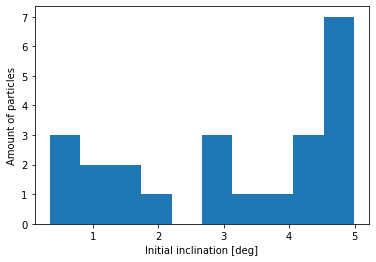

In [25]:
# Histogram of starting inclinations of particles classified as potential Oort cloud objects
keys = []
for i in range(len(logtimes)):
    oort_objs = np.argwhere((a_orbit(Sun, sets[i]) > (100|units.AU)) & (v_rel(Sun, sets[i]).in_(units.km/units.s) < v_esc(Sun.mass, separations(Sun, sets[i])).in_(units.km/units.s)) & (separations(Sun, sets[i])<(250000|units.AU)) & (eccentricities(Sun, sets[i]) < 1))
    for index in oort_objs:
        if sets[i][index].key not in keys:
            keys.append(sets[i][index].key)

Oort_i = np.array([])
for key in keys:
    Oort_i = np.append(Oort_i, inclinations(Sun, sets[0][sets[0].key==key]).in_(units.deg).number)
plot.hist(Oort_i)
plt.xlabel("Initial inclination [deg]")
plt.ylabel("Amount of particles")
np.save('begin_i_pot_Oort_van8.npy', Oort_i)